In [1]:
import numpy as np

In [2]:
import pandas as pd

1) Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [161]:
df = pd.read_csv('C:\\Users\\anime\\Desktop\\UTD_STUDY\\Fall_2018\\Programming for Data Science\\\Homework\\HW2\\Batting.csv')

2)	Print out the dimensions and info about the dataframe you just created

In [4]:
#Dimensions of Dataframe
#shape will give the number of rows and columns in the daraframe
print(df.shape)

(102816, 25)


In [5]:
#To get the number of rows of the data frame
len(df)

102816

In [6]:
#To get the total number of elements in the DataFrame
df.size

2570400

In [7]:
# info about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [405]:
#Doubt
#df_season = df[df['HR'] > 40].loc('playerID')
a = (df.groupby(['playerID','yearID' ]))['HR'].sum().reset_index()
b = (a[a['HR'] >=40]).reset_index(drop = True)
#b['playerID'].nunique()
b['playerID'].count()

330

4)	How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)

In [317]:
a = (df.groupby(['playerID','nameFirst', 'nameLast']))['HR'].sum().reset_index()
b = a[a['HR'] >= 600].reset_index(drop = True)
print(b[['nameFirst', 'nameLast', 'HR']])
rows = len(a[a['HR'] >= 600])
str1 = '\nNumbers of players scoring more than 600 home runs = '
str2 = str(rows)
print(str1 + str2)


  nameFirst   nameLast   HR
0      Hank      Aaron  755
1     Barry      Bonds  762
2       Ken    Griffey  630
3    Willie       Mays  660
4      Alex  Rodriguez  696
5      Babe       Ruth  714
6     Sammy       Sosa  609
7       Jim      Thome  612

Numbers of players scoring more than 600 home runs = 8


5) How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)

In [451]:
a = (df.groupby(['playerID','yearID' ]))['2B','3B','H','HR',].sum().reset_index()
b = (a[(a['2B'] >= 40) & (a['3B'] >= 10) & (a['H'] >= 200) & (a['HR'] >= 30)]).reset_index(drop = True)
b['playerID'].nunique()


11

6) How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )

In [452]:
a = (df.groupby(['playerID','nameFirst', 'nameLast','yearID']))['SB'].sum().reset_index()
b = a[a['SB'] >= 100].sort_values(by=['SB'], ascending=False).reset_index(drop = True)
c = b[['nameFirst', 'nameLast','yearID','SB' ]]
print(c)
rows = len(c)
str1 = str(rows)
str2 = ' players seasons have had 100 or more SBs'
print('\n')
print(str1 +str2)


   nameFirst   nameLast  yearID     SB
0       Hugh      Nicol    1887  138.0
1     Rickey  Henderson    1982  130.0
2      Arlie     Latham    1887  129.0
3        Lou      Brock    1974  118.0
4    Charlie   Comiskey    1887  117.0
5      Billy   Hamilton    1889  111.0
6       John       Ward    1887  111.0
7      Billy   Hamilton    1891  111.0
8      Vince    Coleman    1985  110.0
9      Vince    Coleman    1987  109.0
10     Arlie     Latham    1888  109.0
11    Rickey  Henderson    1983  108.0
12     Vince    Coleman    1986  107.0
13       Tom      Brown    1891  106.0
14     Maury      Wills    1962  104.0
15      Pete   Browning    1887  103.0
16      Hugh      Nicol    1888  103.0
17       Jim    Fogarty    1887  102.0
18     Billy   Hamilton    1890  102.0
19    Rickey  Henderson    1980  100.0


20 players seasons have had 100 or more SBs


7)	How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [453]:
a = df[(df['yearID'] >=1960) & (df['yearID'] <=1969)]
b = (a.groupby(['playerID','nameFirst', 'nameLast']))['HR'].sum().reset_index()
c = b[b['HR'] >= 200].sort_values(by=['HR'], ascending=False).reset_index(drop = True)
d = c[['nameFirst', 'nameLast', 'HR']]
print(d)
rows = len(d)
str1 = str(rows)
str2 = ' players in the 1960s (yearID) have hit 200 or more HRs'
print('\n')
print(str1 +str2)


   nameFirst     nameLast   HR
0     Harmon    Killebrew  393
1       Hank        Aaron  375
2     Willie         Mays  350
3      Frank     Robinson  316
4     Willie      McCovey  300
5      Frank       Howard  288
6       Norm         Cash  278
7      Ernie        Banks  269
8     Mickey       Mantle  256
9    Orlando       Cepeda  254
10       Ron        Santo  253
11     Billy     Williams  249
12     Rocky     Colavito  245
13       Bob      Allison  225
14     Roger        Maris  217
15     Eddie      Mathews  213
16        Al       Kaline  210
17      Boog       Powell  202
18      Carl  Yastrzemski  202


19 players in the 1960s (yearID) have hit 200 or more HRs


8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [454]:
a = df.groupby(['playerID','nameFirst', 'nameLast'])['HR'].sum().reset_index()
b = (a.sort_values(by=['HR'], ascending=False)).reset_index(drop = True).head(1)
b[['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
0,Barry,Bonds,762


9)	Who had the most hits (H) in the 1970s? (Dataframe)

In [455]:
a = df[(df['yearID'] >=1970) & (df['yearID'] <=1979)]
b = a.groupby(['playerID','nameFirst', 'nameLast'])['H'].sum().reset_index()
c = b.sort_values(by=['H'], ascending=False).reset_index(drop = True)
c[['nameFirst', 'nameLast','H']].head(1)

,nameFirst,nameLast,H
0,Pete,Rose,2045


10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)

In [456]:
a = df[df['yearID'] == 1977]
a['PA'] = (a['AB']+ a['BB'] + a['HBP'] + a['SH'] + a['SF'])
b = a[a['PA'] >= 500]
#a[['AB', 'BB', 'HBP', 'SH', 'SF']].sum(axis=1)
#.apply(lambda row: row['AB'] + row['BB'] + row['SH']+ row['HBP']+ row['SF'], axis=1) 
b['OBP'] = ((a['H']+ a['BB'] + a['HBP'])/ (a['AB']+ a['BB'] + a['HBP'] + a['SF']))
c = b.sort_values(by=['OBP'], ascending=False).reset_index(drop = True).head()
c[['nameFirst', 'nameLast', 'OBP']]

C:\Users\anime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\anime\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,nameFirst,nameLast,OBP
0,Rod,Carew,0.448773
1,Ken,Singleton,0.437788
2,Reggie,Smith,0.426910
3,Mike,Hargrove,0.420312
4,Joe,Morgan,0.417054


11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)

In [338]:
a = df[df['yearID'] == 2013]
a['PA'] = (a['AB']+ a['BB'] + a['HBP'] + a['SH'] + a['SF'])
b = a[a['PA'] >= 300]
#Calculating Batting Average
b['BA'] = (b['H']/b['AB'])
# Sorting in ascending order by batting average 
c = b.sort_values(by=['BA'], ascending=False).reset_index(drop = True).head(8)
c[['nameFirst', 'nameLast', 'BA']]

C:\Users\anime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\anime\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,nameFirst,nameLast,BA
0,Miguel,Cabrera,0.347748
1,Hanley,Ramirez,0.345395
2,Michael,Cuddyer,0.331288
3,Joe,Mauer,0.323596
4,Mike,Trout,0.322581
5,Chris,Johnson,0.321012
6,Freddie,Freeman,0.319419
7,Yasiel,Puig,0.319372


12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits) (Top 5 is required)

In [368]:
a = df[(df['yearID'] >= 1940) & (df['yearID'] <= 1949)]
b = (a.groupby([ 'playerID','nameFirst', 'nameLast']))['H'].sum().reset_index()
c = b.sort_values(by=['H'], ascending=False).reset_index(drop = True)
c[['nameFirst', 'nameLast', 'H']].head()

,nameFirst,nameLast,H
0,Lou,Boudreau,1578
1,Bob,Elliott,1563
2,Dixie,Walker,1512
3,Stan,Musial,1432
4,Bobby,Doerr,1407


13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [465]:
a = df.groupby(['playerID','nameFirst', 'nameLast','yearID'])['H'].sum().reset_index()
b = a.sort_values(['yearID', 'H'], ascending=[True, False]).drop_duplicates(['yearID']).reset_index(drop=True)
grouped = (b.groupby(['playerID','nameFirst','nameLast'])).size().reset_index().rename(columns={0:'count'})
c1 = grouped.sort_values(by=['count'], ascending=False)
#c1


In [422]:
a = df.groupby(['playerID','nameFirst', 'nameLast','yearID'])['H'].sum().reset_index()
b = a.sort_values(['yearID', 'H'], ascending=[True, False]).drop_duplicates(['yearID']).reset_index(drop=True)
grouped = (b.groupby(['playerID','nameFirst','nameLast']))['H'].sum()
c2 =grouped.reset_index().rename(columns={0:'TH'}).sort_values(by=['H'], ascending=False)
#c2


In [458]:
# count = Number of times that player scored highest in a season 
# H = Total Number of hits scored in all the seasons in which the player scored highest hits 
d = pd.merge(c1,c2,how='outer')
d.head(1)


,playerID,nameFirst,nameLast,count,H
0,cobbty01,Ty,Cobb,7,1526


14) Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe

In [426]:
a=df
a['freq'] = df.groupby('playerID')['playerID'].transform('count')
b = a[['nameFirst', 'nameLast', 'freq']]
c = b.sort_values(by = ['freq'], ascending = False)
d = c.drop_duplicates().reset_index(drop = True)
d.head()

,nameFirst,nameLast,freq
0,Deacon,McGuire,31
1,Rickey,Henderson,29
2,Bobo,Newsom,29
3,Jim,Kaat,28
4,Tommy,John,28


15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [428]:
a = df[['playerID', 'H','HR']]
b = a.groupby('playerID').sum()
c= b[(b['H'] >= 3000) & (b['HR'] >= 500)]
len(c)


5

16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [160]:
a = df[df['yearID'] ==1988]
b = a[['yearID', 'HR']]
c = b.groupby('yearID').sum()
c.iloc[0]['HR']

3180

17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average

In [333]:
a = df[(df['nameFirst'] == 'Wade') & (df['nameLast'] == 'Boggs')]
a['BA'] = (a['H']/a['AB'])
b = a[a['AB'] >= 500]
c = b[['nameFirst', 'nameLast', 'yearID','AB','BA']]
c.sort_values(by = ['AB'], ascending = False).reset_index(drop = True).head(3)

C:\Users\anime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,nameFirst,nameLast,yearID,AB,BA
0,Wade,Boggs,1985,653,0.367534
1,Wade,Boggs,1984,625,0.324800
2,Wade,Boggs,1989,621,0.330113


18)	 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP

In [429]:
a = df[df['yearID'] == 1995]
a['PA'] = (a['AB']+ a['BB'] + a['HBP'] + a['SH'] + a['SF'])
a['OBP'] = ((a['H']+ a['BB'] + a['HBP'])/ (a['AB']+ a['BB'] + a['HBP'] + a['SF']))
b = a[a['PA'] >=400]
c = b.sort_values( by = ['OBP'], ascending = False).reset_index(drop = True).head(10)
c[['nameFirst', 'nameLast', 'OBP']]

C:\Users\anime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\anime\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,nameFirst,nameLast,OBP
0,Edgar,Martinez,0.478873
1,Frank,Thomas,0.454405
2,Mark,McGwire,0.440758
3,Jim,Thome,0.438061
4,Barry,Bonds,0.431496
5,Tim,Salmon,0.429467
6,Chili,Davis,0.429119
7,Dave,Magadan,0.427553
8,Chuck,Knoblauch,0.424483
9,Tim,Naehring,0.414729


19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs (only one person is required)

In [430]:
a = df[(df['yearID'] == 1922)| (df['yearID'] == 1925) | (df['yearID'] == 1926) | (df['yearID'] == 1928)]
b = a[['playerID','nameFirst', 'nameLast', 'yearID','3B']]
c = b.groupby(['playerID','nameFirst', 'nameLast'], as_index=False)['3B'].sum()
d = c.sort_values(by = ['3B'], ascending = False).reset_index(drop = True)
d[['nameFirst', 'nameLast','3B']].head(1)

,nameFirst,nameLast,3B
0,Curt,Walker,59


20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [431]:
#Doubt
a = df[['playerID', 'yearID', 'HR', 'SB']]

b  = a.groupby(['playerID', 'yearID'],as_index=False).sum()
c = b[(b['HR'] >= 30) & (b['SB'] >= 30) ]
c
#c['playerID'].count()
c['playerID'].nunique()


38

21) Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [432]:
a = df[(df['yearID'] ==1986) & (df['AB'] >= 400)]
a.loc[:,'OBP'] = ((a.loc[:,'H']+ a.loc[:,'BB'] + a.loc[:,'HBP'])/ (a.loc[:,'AB']+ a.loc[:,'BB'] + a.loc[:,'HBP'] + a.loc[:,'SF']))
b = a.sort_values(by = ['OBP'], ascending = False).reset_index(drop = True)
b[['nameFirst', 'nameLast', 'OBP']].head(1)

C:\Users\anime\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\anime\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,nameFirst,nameLast,OBP
0,Wade,Boggs,0.45283


22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)

In [433]:
a = df[(df['yearID'] == 1997) & (df['AB'] >= 400) & (df['lgID'] == 'NL')]
a['OBP'] = ((a['H']+ a['BB'] + a['HBP'])/ (a['AB']+ a['BB'] + a['HBP'] + a['SF']))
b = a.sort_values(by = ['OBP'], ascending = False).reset_index(drop = True)
b[['nameFirst', 'nameLast', 'OBP']].head(1)

C:\Users\anime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,nameFirst,nameLast,OBP
0,Larry,Walker,0.451807


23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending) (500 At bats in that league, MLB, ML… does not matter, only year matters)

In [434]:
a = df[(df['yearID'] == 2012) & (df['AB'] >= 500) ]
n = len(a)
sum = a['HR'].sum()
avg_HR = (sum/n)
b = a[a['HR'] > avg_HR].sort_values(by = ['HR'], ascending = False)
c = b[['nameFirst', 'nameLast', 'HR']].reset_index(drop = True)
c['avgHR'] = avg_HR
c


,nameFirst,nameLast,HR,avgHR
0,Miguel,Cabrera,44,20.672897
1,Josh,Hamilton,43,20.672897
2,Curtis,Granderson,43,20.672897
3,Edwin,Encarnacion,42,20.672897
4,Ryan,Braun,41,20.672897
5,Adam,Dunn,41,20.672897
6,Adrian,Beltre,36,20.672897
7,Josh,Willingham,35,20.672897
8,Jay,Bruce,34,20.672897
9,Adam,LaRoche,33,20.672897


24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [443]:
a = (df.groupby(['playerID','nameFirst', 'nameLast', 'yearID'], as_index=False))['HR'].sum()
b = a[a['HR'] >= 50]
c = df[['playerID','birthYear' ]]
d = c.drop_duplicates()
e = pd.merge(b, d, on='playerID')
f = e.sort_values(by = ['birthYear'], ascending = False)
g = f[['nameFirst','nameLast', 'HR','yearID','birthYear']].reset_index(drop = True)
g.head(1)



,nameFirst,nameLast,HR,yearID,birthYear
0,Chris,Davis,53,2013,1986


25)	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)

In [444]:
a = (df.groupby(['playerID','nameFirst', 'nameLast','birthYear'], as_index=False))['HR'].sum()
b = a[a['HR'] >=300].sort_values(by = ['birthYear'], ascending = False).reset_index(drop = True).head()
c = b[['nameFirst', 'nameLast','birthYear']]
c
#d = (df.groupby(['playerID','yearID'], as_index=False))['HR'].sum()
#d.sort_values(by = ['HR'], ascending = False).head()

,nameFirst,nameLast,birthYear
0,Prince,Fielder,1984
1,Edwin,Encarnacion,1983
2,Miguel,Cabrera,1983
3,Adrian,Gonzalez,1982
4,Albert,Pujols,1980


Grading: Each task will be worth 3.5 pts (there will be 25 total).  Naming convention and github link will be worth 6.25 pts apiece.  I will include the two bonus questions which will be worth 1 pt apiece (they will be simple viz questions)
BONUS:  Graph total HRs per season using bar graph

Using a line graph please graph the average HRs per AB (think about this) per season

Helpful links: 
https://www.baseball-reference.com/bullpen/On_base_percentage
https://www.baseball-reference.com/bullpen/Batting_average


In [305]:
import matplotlib.pyplot as plt

Bonus Ques1: Graph total HRs per season using bar graph

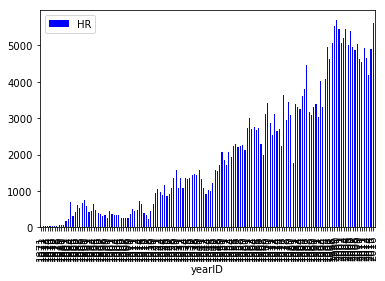

In [353]:
a = df.groupby(['yearID'], as_index = False)['HR'].sum()
a.plot('yearID', 'HR', kind='bar', color='b')
plt.show()

Bonus Ques2: Using a line graph please graph the average HRs per AB (think about this) per season

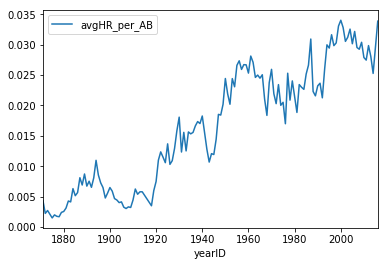

In [446]:
a = df[['yearID', 'HR', 'AB']]
b = a.groupby(['yearID']).sum().reset_index(drop = False)
b['avgHR_per_AB'] = (b['HR']/b['AB'])
b
lines = b.plot.line(x='yearID', y='avgHR_per_AB')
plt.show()